# Simple Linear Regression

Q1.    1) Delivery_time -> Predict delivery time using sorting time 

2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as smf
import statsmodels.formula.api as sm
# import scipy.stats as stats

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### EDA and Data Visualization

In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print(data[data.duplicated()])


 Describe:
       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None

 Null values:
Delivery Time    0
Sorting Time     0
dtype: int64

 Duplicated:
Empty DataFrame
Columns: [Delivery Time, Sorting Time]
Index: []


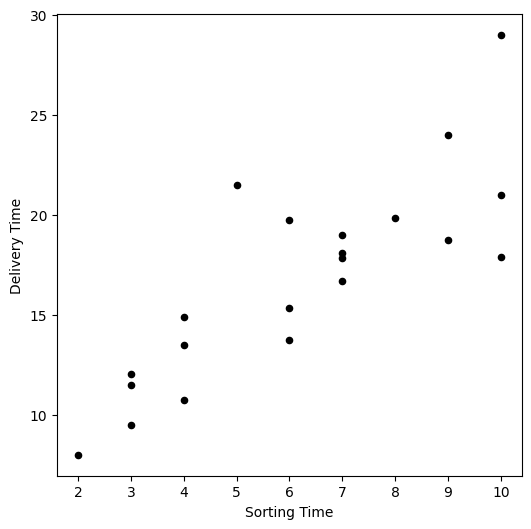

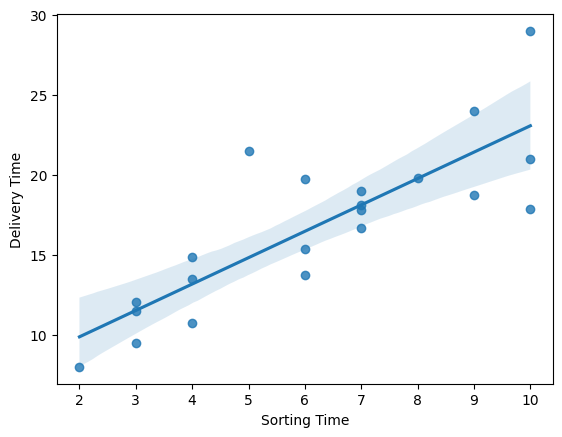

In [5]:
# Data visualizing 
data.plot(kind="scatter",
           y="Delivery Time",
           x="Sorting Time",
           figsize=(6,6),
           color="black");
plt.show()

sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])
plt.show()

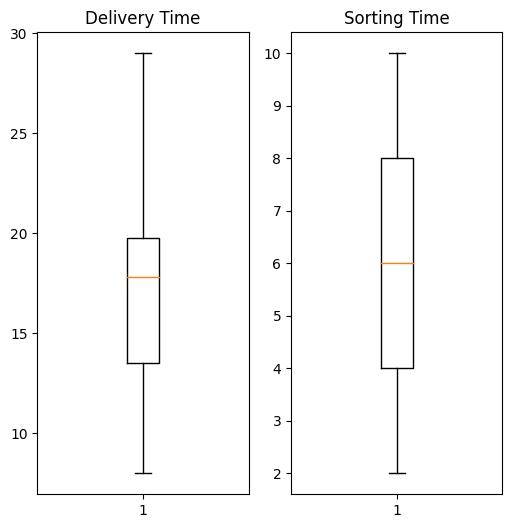

In [6]:
# display boxplots
plt.subplots(figsize = (6,6))
plt.subplot(121)   #represents the number of rows in the grid, the number of columns in the grid and the position of the subplot in the grid 
plt.boxplot(data['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

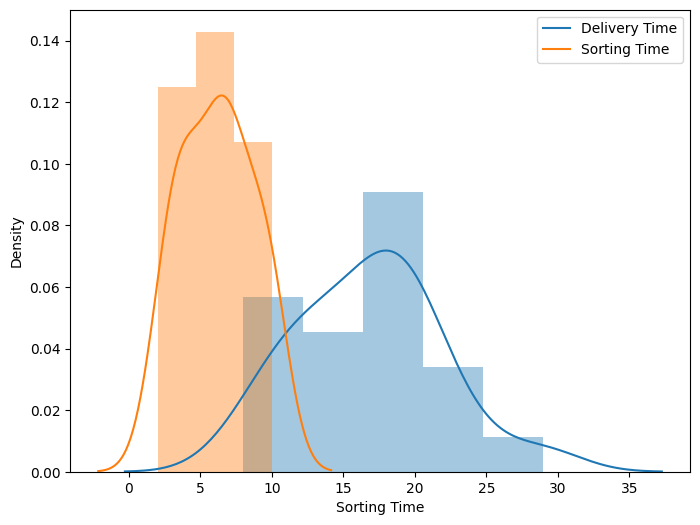

In [7]:
#  side-by-side distribution plot
plt.figure(figsize = (8,6))
labels = ['Delivery Time', 'Sorting Time']
sns.distplot(data['Delivery Time'], kde = True)
sns.distplot(data['Sorting Time'],hist = True)
plt.legend(labels)
plt.show()

## Correlation Analysis

In [8]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Model Building  & Testing

### Based on SK learn LR

In [9]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(data["Sorting Time"]), 
                     y = data["Delivery Time"])

# Check trained model y-intercept
print("y-intercept:",regression_model.intercept_)

# Check trained model coefficients
print("model coefficients:",regression_model.coef_)

# Check regression_model.score
score1=regression_model.score(X = pd.DataFrame(data["Sorting Time"]), 
                       y = data["Delivery Time"])
print("score:",score1)

y-intercept: 6.58273397199706
model coefficients: [1.6490199]
score: 0.6822714748417231


In [10]:
# Mean Squared Error (MSE) & Root Mean Squared Error (RMSE):
predictions = regression_model.predict(X=pd.DataFrame(data["Sorting Time"]))
mse1 = mean_squared_error(data["Delivery Time"], predictions)
rmse = np.sqrt(mse1)
print("Mean Squared Error:", mse1)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 7.793311548584063
Root Mean Squared Error: 2.7916503270617654


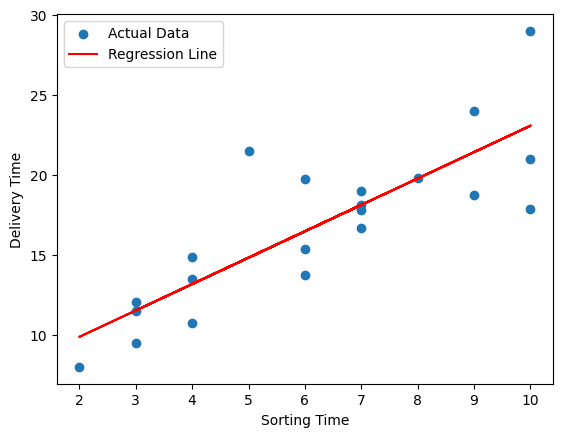

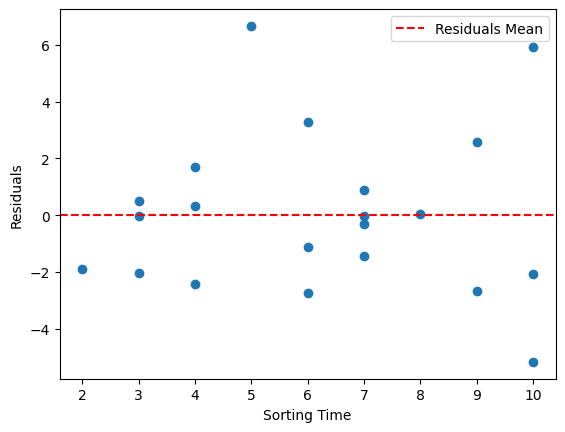

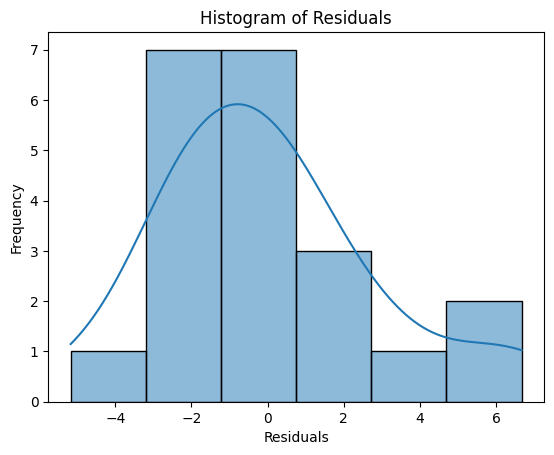

In [11]:
# Visualization
plt.scatter(data["Sorting Time"], data["Delivery Time"], label='Actual Data')
plt.plot(data["Sorting Time"], predictions, label='Regression Line', color='red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()
plt.show()

# Residual Analysis
residuals = data["Delivery Time"] - predictions
plt.scatter(data["Sorting Time"], residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel('Sorting Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


### statsmodels for linear regression

In [12]:
dataset=data.rename({'Delivery Time':'DeliveryTime', 'Sorting Time':'SortingTime'},axis=1)
# Fit the model
model = sm.ols(formula='DeliveryTime ~ SortingTime', data=dataset).fit()

# Print model summary
print(model.summary())

# Check model parameters
print("Parameters:")
print(model.params)

# Predictions
predictions = model.predict(dataset['SortingTime'])
# print("Predictions:")
# print(predictions)

# Residuals
residuals = dataset['DeliveryTime'] - predictions
# print("Residuals:")
# print(residuals)

# R-squared value
score2=model.rsquared
print("R-squared:", model.rsquared)

# Calculate Mean Squared Error
mse2 = mean_squared_error(dataset['DeliveryTime'], predictions)
print("Mean Squared Error:", mse2)

                            OLS Regression Results                            
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        01:34:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      

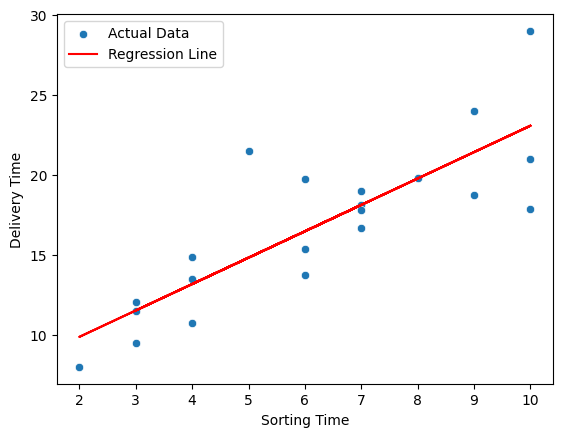

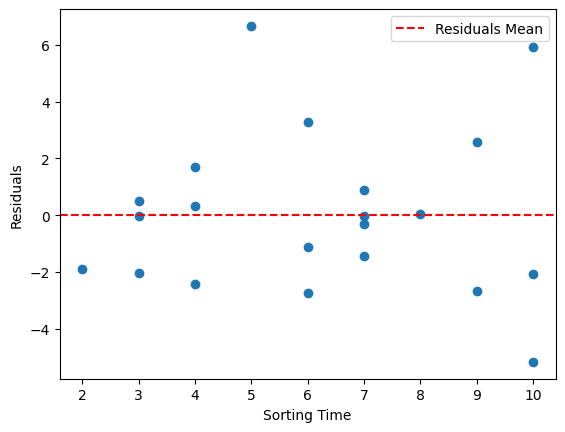

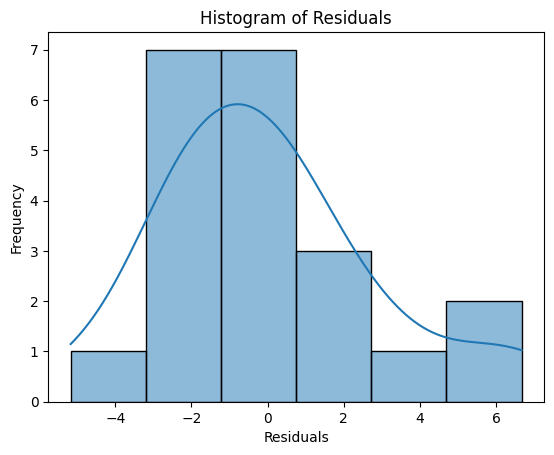

In [13]:
# Visualize the regression line along with the actual data points
sns.scatterplot(x='SortingTime', y='DeliveryTime', data=dataset, label='Actual Data')
plt.plot(dataset['SortingTime'], model.predict(dataset['SortingTime']), label='Regression Line', color='red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()
plt.show()

# Residuals
residuals = model.resid

# Residual Analysis
plt.scatter(dataset['SortingTime'], residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel('Sorting Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [14]:
# Compare both method score, mse
print(score1,score2)
print(mse1,mse2)

0.6822714748417231 0.6822714748417231
7.793311548584063 7.793311548584062


### Normalizing features

In [15]:
# CustomScaler

#Square
class SquareScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X ** 2 
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)
    
    
#Log
class LogScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.log(X + 1)
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)

without normalization
score: 0.6822714748417231 
mse: 7.793311548584063

scaler_name: Standard Scaler
score: 0.6822714748417231
mse: 7.793311548584063

scaler_name: Square Transformation
score: 0.6302871815826638
mse: 9.068393138438141

scaler_name: Log Transformation
score: 0.6970476042045002
mse: 7.430879565025339

 best_scaler: Log Transformation


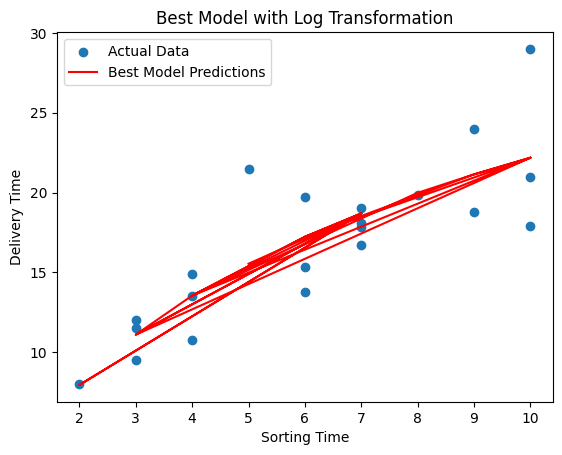

In [16]:
# Normalization to input data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X = data[['Sorting Time']]
y = data[['Delivery Time']]
X_train = X
X_test = X
y_train= y
y_test = y 

print('without normalization')
print("score:",score1,"\nmse:",mse1)

results = {}

scalers = {
    'Standard Scaler': StandardScaler(),
    # 'MinMax Scaler': MinMaxScaler(),
    # 'Robust Scaler': RobustScaler(),
    # 'Log Transformation': PowerTransformer(method='box-cox'),
    'Square Transformation': SquareScaler(),
    'Log Transformation': LogScaler(),
}

for scaler_name, scaler in scalers.items():
    print("\nscaler_name:",scaler_name)
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train_scaled, y_train)
    
    # Check regression_model.score
    score=regression_model.score(X = X_train_scaled, 
                       y = y_train)
    print("score:",score)
    
    predictions = regression_model.predict(X_test_scaled)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    print("mse:",mse)

    results[scaler_name] = {'model': regression_model, 'predictions': predictions, 'mse': mse}

# Choose the best model based on mse
best_scaler = min(results, key=lambda x: results[x]['mse']); print("\n best_scaler:", best_scaler)
best_model = results[best_scaler]['model']   
best_predictions = results[best_scaler]['predictions']

# Visualize the best model's predictions
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, best_predictions, label='Best Model Predictions', color='red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()
plt.title(f'Best Model with {best_scaler}')
plt.show()


In [17]:
# Final output comparison
X_scaled = LogScaler().fit_transform(X)
predictions_new = best_model.predict(X_scaled)
data['Delivery Time_pred']=pd.DataFrame(predictions_new,columns=['Delivery Time'])

print(data)

    Delivery Time  Sorting Time  Delivery Time_pred
0           21.00            10           22.180112
1           13.50             4           13.539214
2           19.75             6           17.226696
3           24.00             9           21.135584
4           29.00            10           22.180112
5           15.35             6           17.226696
6           19.00             7           18.690099
7            9.50             3           11.093729
8           17.90            10           22.180112
9           18.75             9           21.135584
10          19.83             8           19.980913
11          10.75             4           13.539214
12          16.68             7           18.690099
13          11.50             3           11.093729
14          12.03             3           11.093729
15          14.88             4           13.539214
16          13.75             6           17.226696
17          18.11             7           18.690099
18          

## Model Predictions

In [18]:
# New Data
X_new = pd.Series(np.arange(0.5, 10, 1.5))
# X_new = X_new.values.reshape(-1, 1)
X_new=pd.DataFrame(X_new,columns=['Sorting Time'])
X_scaled = LogScaler().fit_transform(X_new)
predictions_new = best_model.predict(X_scaled)
predictions_new=pd.DataFrame(predictions_new,columns=['Delivery Time'])

predicted = pd.concat([predictions_new, X_new], axis=1)
print(predicted)


   Delivery Time  Sorting Time
0       0.344579           0.5
1       7.940950           2.0
2      12.384542           3.5
3      15.537321           5.0
4      17.982806           6.5
5      19.980913           8.0
6      21.670288           9.5
